In [1]:
# Standard ds imports:
import pandas as pd
import numpy as np

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Data Prep
from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# Statistics
from scipy import stats

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn.metrics import \
accuracy_score,\
recall_score,\
precision_score,\
confusion_matrix,\
classification_report

import warnings
warnings.filterwarnings("ignore")

# Custom Modules
import os
import env
import acquire_telco as a
import prepare as p

In [2]:
df = a.get_telco_data()

this file exists, reading csv


In [3]:
df = p.prep_telco(df)

In [4]:
num_col = df.select_dtypes(include='number').columns
num_col

Index(['senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'gender_male', 'has_partner', 'has_dependents', 'has_phone_service',
       'has_paperless_billing', 'has_tech_support', 'has_online_security',
       'has_online_backup', 'has_streaming_tv', 'has_streaming_movies',
       'has_device_protection', 'has_multiple_lines', 'contract',
       'internet_service', 'has_automatic_payment'],
      dtype='object')

Univariate Stats

senior_citizen


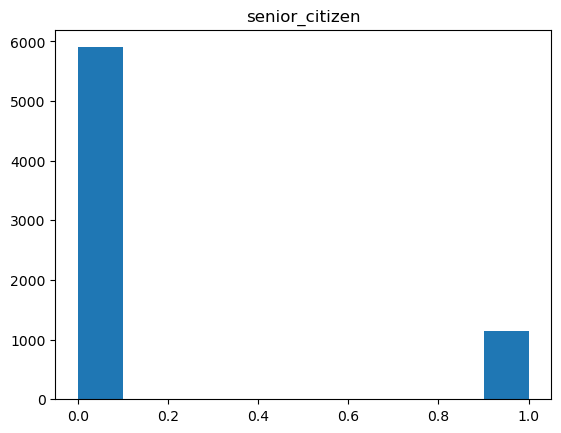

tenure


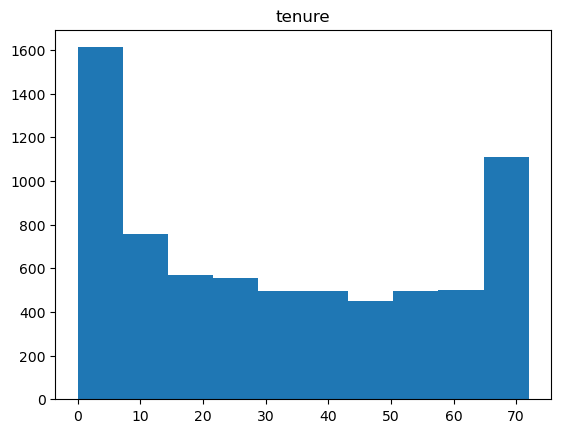

monthly_charges


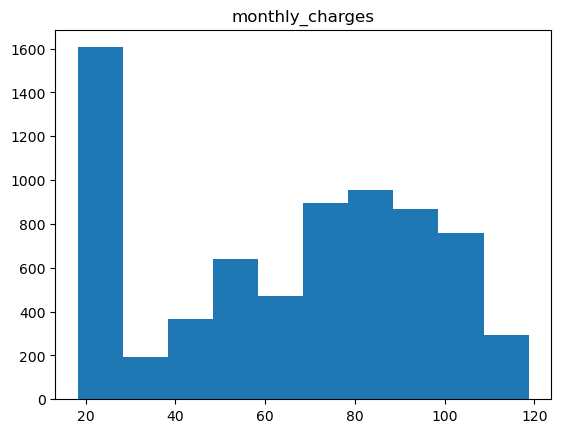

total_charges


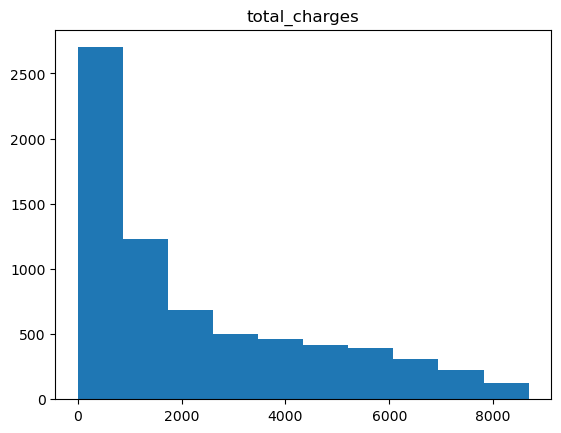

gender_male


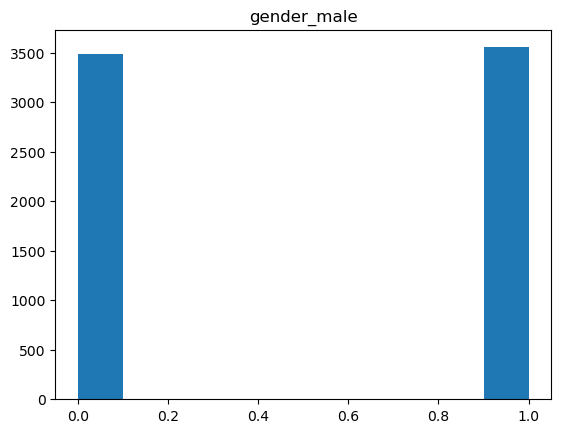

has_partner


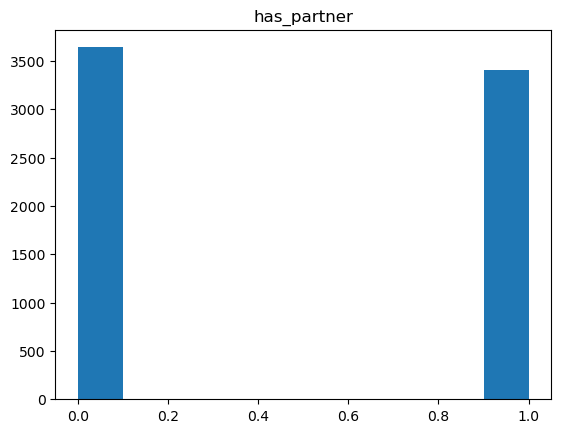

has_dependents


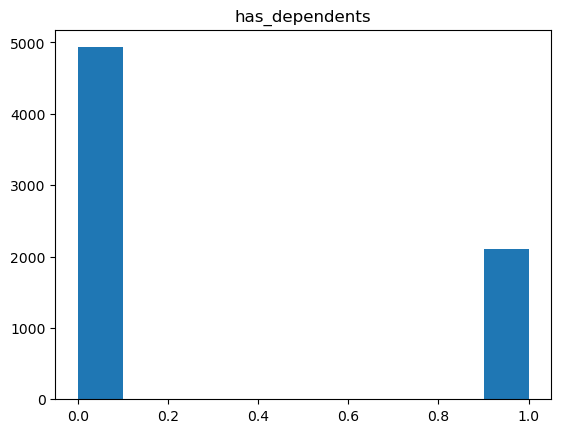

has_phone_service


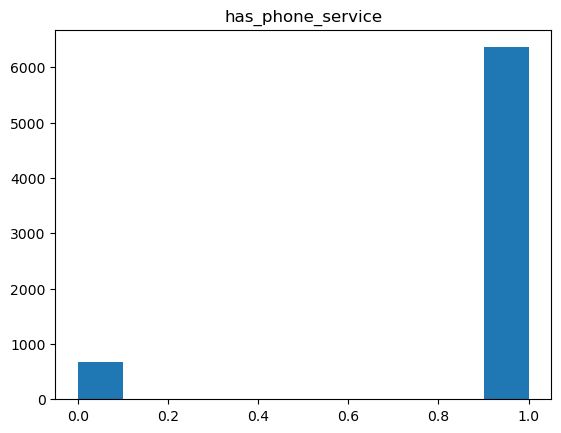

has_paperless_billing


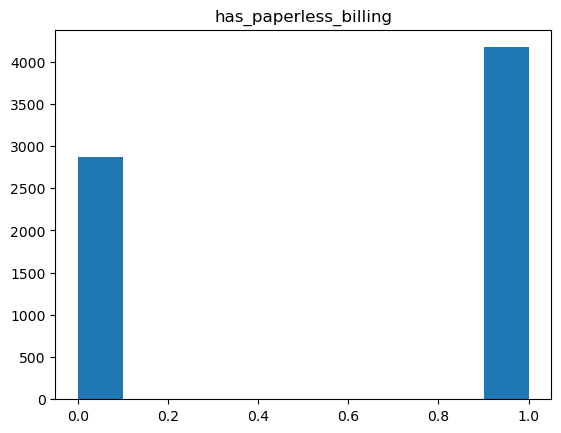

has_tech_support


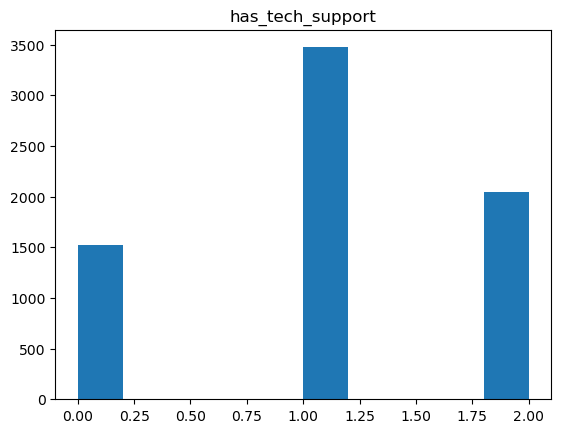

has_online_security


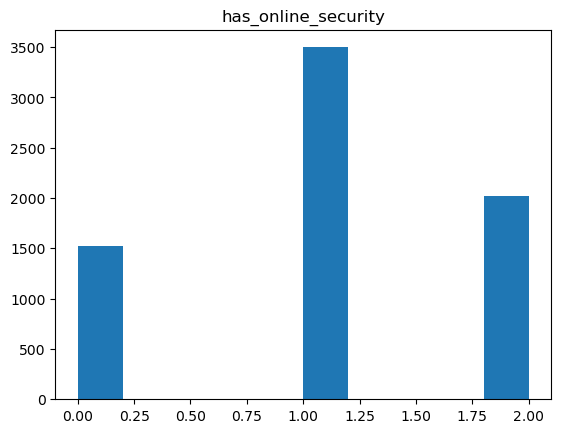

has_online_backup


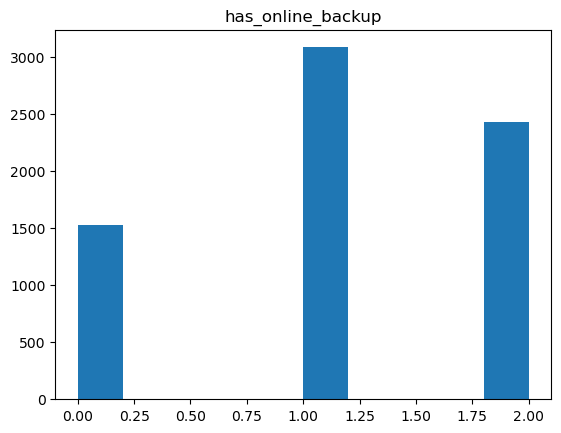

has_streaming_tv


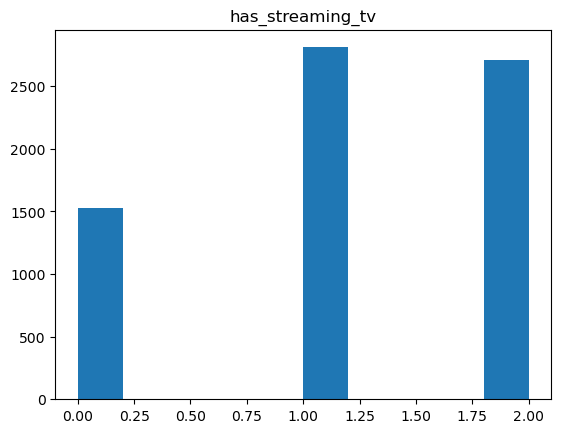

has_streaming_movies


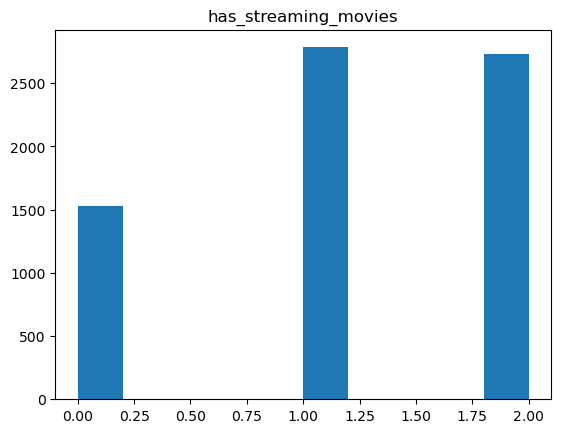

has_device_protection


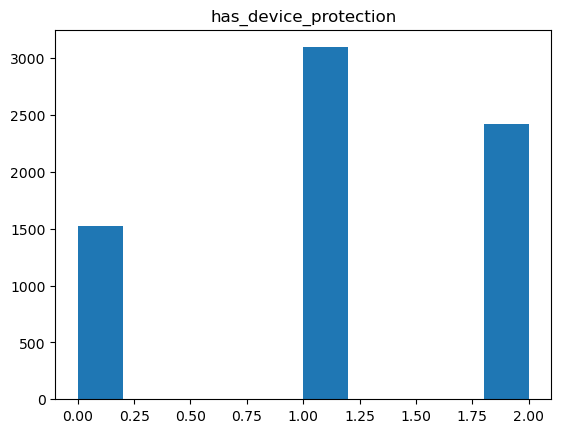

has_multiple_lines


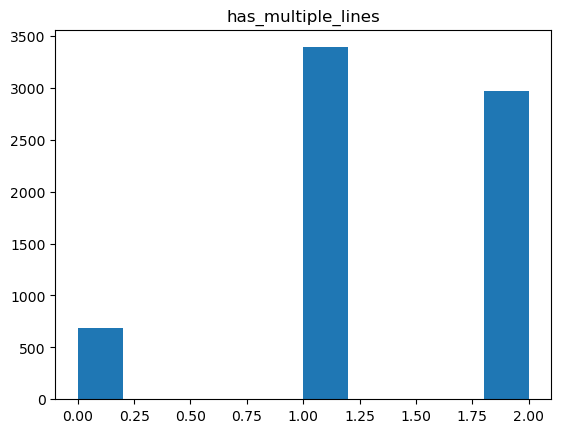

contract


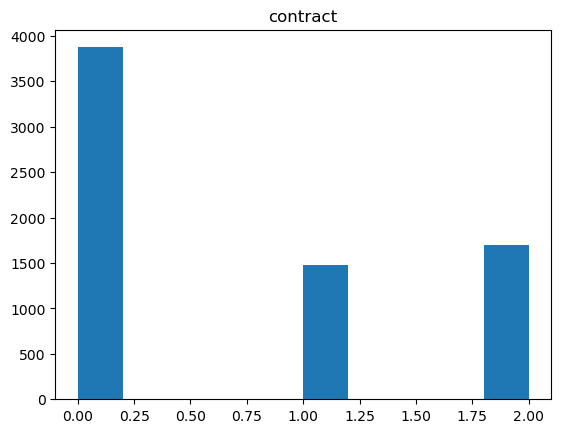

internet_service


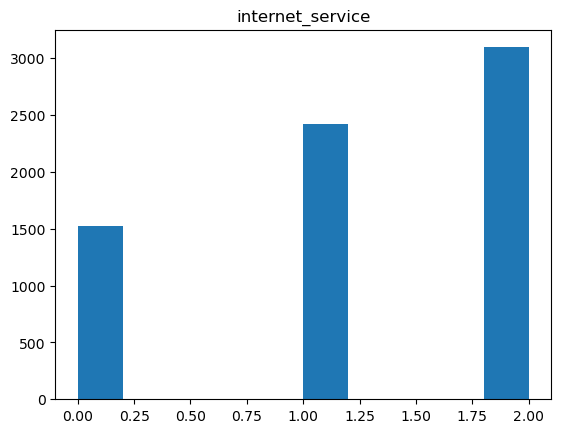

has_automatic_payment


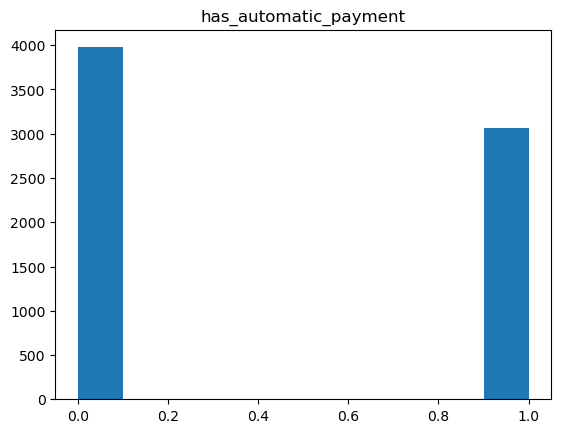

In [5]:
for col in num_col:
    print(col)
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [6]:
str_col = df.select_dtypes(exclude='number').columns
str_col

Index(['customer_id', 'churn'], dtype='object')

churn
churn
No     5174
Yes    1869
Name: count, dtype: int64
churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


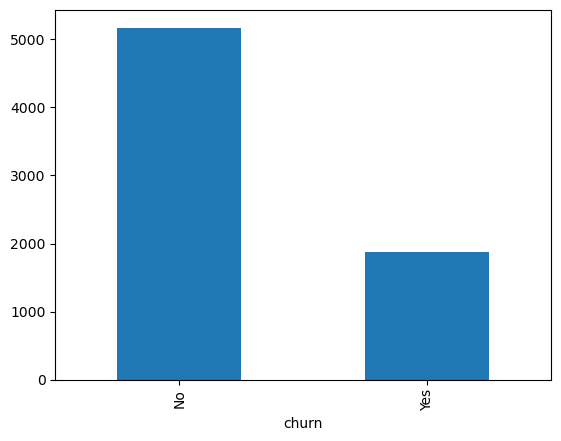

In [7]:
for col in str_col[1:]:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True)) #percentage
    df[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

>From the given data, we can see that almost 27% of customers have churned.

In [8]:
df['churned'] = (df['churn'] == 'Yes')
df = df.drop(columns='churn')

In [9]:
train, validate, test = p.splitting_data(df, 'churned')

In [10]:
train.shape

(4225, 21)

In [11]:
validate.shape

(1409, 21)

In [12]:
test.shape

(1409, 21)

In [13]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,gender_male,has_partner,has_dependents,has_phone_service,has_paperless_billing,...,has_online_security,has_online_backup,has_streaming_tv,has_streaming_movies,has_device_protection,has_multiple_lines,contract,internet_service,has_automatic_payment,churned
2865,4083-BFNYK,1,38,95.00,3591.25,0,1,0,1,0,...,2,2,1,2,1,2,1,2,1,False
4107,5804-LEPIM,1,2,70.35,139.05,0,0,0,1,1,...,1,1,1,1,1,1,0,2,0,True
3453,4895-TMWIR,1,11,19.95,214.75,1,1,0,1,0,...,0,0,0,0,0,1,0,0,0,True
923,1342-JPNKI,0,10,86.05,834.10,1,0,0,1,1,...,1,1,2,1,1,2,0,2,1,True
2370,3397-AVTKU,0,43,60.00,2548.55,1,0,0,1,1,...,1,2,1,2,1,1,2,1,0,False


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 2865 to 5354
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            4225 non-null   object 
 1   senior_citizen         4225 non-null   int64  
 2   tenure                 4225 non-null   int64  
 3   monthly_charges        4225 non-null   float64
 4   total_charges          4225 non-null   float64
 5   gender_male            4225 non-null   int64  
 6   has_partner            4225 non-null   int64  
 7   has_dependents         4225 non-null   int64  
 8   has_phone_service      4225 non-null   int64  
 9   has_paperless_billing  4225 non-null   int64  
 10  has_tech_support       4225 non-null   int64  
 11  has_online_security    4225 non-null   int64  
 12  has_online_backup      4225 non-null   int64  
 13  has_streaming_tv       4225 non-null   int64  
 14  has_streaming_movies   4225 non-null   int64  
 15  has_de

In [24]:
for col in num_col:
    print(col)
    print(train[train[col] == 0].churned.mean())
    print(" ")
    #train[col].mean().plot.bar()
    #plt.show()
    #print()

senior_citizen
0.23647691871990936
 
tenure
0.0
 
monthly_charges
nan
 
total_charges
0.0
 
gender_male
0.2650545282124229
 
has_partner
0.33101851851851855
 
has_dependents
0.3103681188787572
 
has_phone_service
0.2512690355329949
 
has_paperless_billing
0.16356228172293363
 
has_tech_support
0.07625272331154684
 
has_online_security
0.07625272331154684
 
has_online_backup
0.07625272331154684
 
has_streaming_tv
0.07625272331154684
 
has_streaming_movies
0.07625272331154684
 
has_device_protection
0.07625272331154684
 
has_multiple_lines
0.2512690355329949
 
contract
0.42698072805139187
 
internet_service
0.07625272331154684
 
has_automatic_payment
0.3486703250316589
 


breakdown contract to see what's causing churn

In [27]:
#month to month contract churn rate
(train[train.contract == 0].churned.mean())

0.42698072805139187

In [25]:
#one year contract churn rate
(train[train.contract == 1].churned.mean())

0.10693970420932879

In [26]:
#two year contract churn rate
(train[train.contract == 2].churned.mean())

0.02967359050445104

In [30]:
X_train = train.drop(columns='churned')
X_validate = validate.drop(columns='churned')
X_test = test.drop(columns='churned')

In [31]:
y_train = train.churned
y_validate = validate.churned
y_test = test.churned

Bivariate Stats:


Hypothesize

Visualize

Analyze (with stats)

Summarize

Hypothesize
Q: Does not having online security affect whether or not someone churns?

$H_o$: There is NO relationship between contract and a customer churning.

$H_a$: There is a relationship between contract and a customer churning.

Visualize

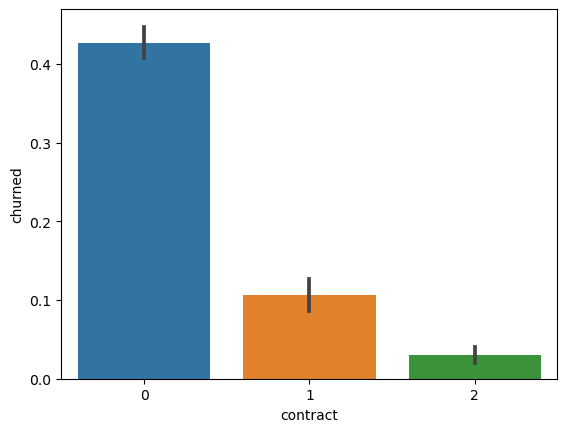

In [29]:
sns.barplot(data=train, x='contract', y='churned');

Analyze

In [45]:
observed = pd.crosstab(train.churned, train.contract)
observed

contract,0,1,2
churned,,,
False,1338,785,981
True,997,94,30


In [46]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [48]:
alpha = 0.5

In [49]:
p

8.298049251133243e-156

my p-value is less than alpha, therefore, we reject the null hypothesis.

We can conclude there is a relationship between being a codeup studend and using a macbook.

Q2: Are high monthly charges causing customers to churn?

High monthly charges is defined as being higher than average monthly charged.

$H_o$: There is NO relationship between monthly charges and a customer churning.

$H_a$: There is a relationship between monthly charges and a customer churning.

In [57]:
high_monthly_charges = train.monthly_charges[train.monthly_charges > train.monthly_charges.mean()]

In [61]:
low_monthly_charges = train.monthly_charges[train.monthly_charges < train.monthly_charges.mean()]

In [97]:
#average monthly charge for a customer that churned
train.monthly_charges[train.churned == True].mean()

74.499955396967

In [132]:
high_monthly_charges.count()

2353

In [133]:
lev_stat, p = stats.levene(low_charges_churn, high_charges_churn)

In [134]:
p

4.602974248553588e-42

In [101]:
train [train.churned == True].monthly_charges

4107    70.35
3453    19.95
923     86.05
2941    45.10
869     96.80
        ...  
4223    96.15
6642    76.20
416     75.20
1286    70.50
3718    86.55
Name: monthly_charges, Length: 1121, dtype: float64

In [128]:
train.monthly_charges[train.monthly_charges < train.monthly_charges.mean()]

3453    19.95
2370    60.00
713     19.60
2941    45.10
935     19.55
        ...  
4881    48.95
1157    61.40
3362    65.10
4011    49.85
4999    59.60
Name: monthly_charges, Length: 1872, dtype: float64

In [185]:
avg_monthly_charges = train['monthly_charges'].mean()

In [186]:
avg_monthly_charges

65.13894674556212

In [176]:
train.churned[train['monthly_charges'] < avg_monthly_charges ].value_counts(normalize=True)

churned
False    0.837073
True     0.162927
Name: proportion, dtype: float64

In [175]:
train.churned[train['monthly_charges'] > avg_monthly_charges ].value_counts(normalize=True)

churned
False    0.653209
True     0.346791
Name: proportion, dtype: float64

In [177]:
train.churned[train['monthly_charges'] < avg_monthly_charges ].value_counts()

churned
False    1567
True      305
Name: count, dtype: int64

In [178]:
train.churned[train['monthly_charges'] > avg_monthly_charges].value_counts()

churned
False    1537
True      816
Name: count, dtype: int64

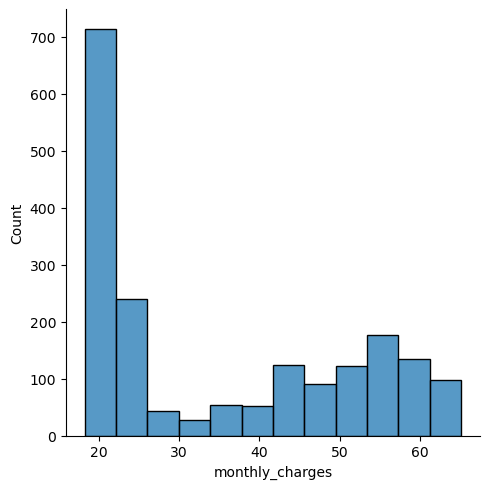

In [156]:
sns.displot(train.monthly_charges[train['monthly_charges']< (train['monthly_charges'].mean())])

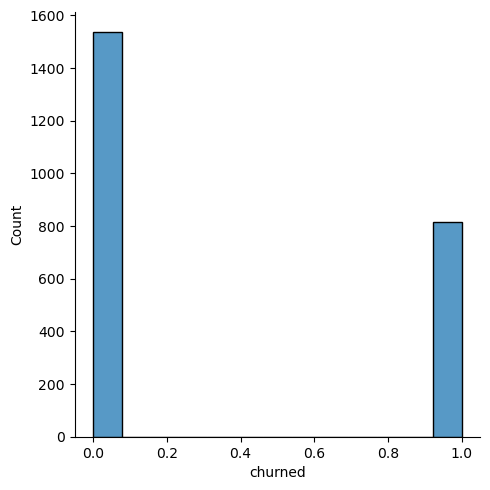

In [183]:
#nearly 35% churn with higher than average monthly payments 
sns.displot(train.churned[train['monthly_charges'] > avg_monthly_charges]);

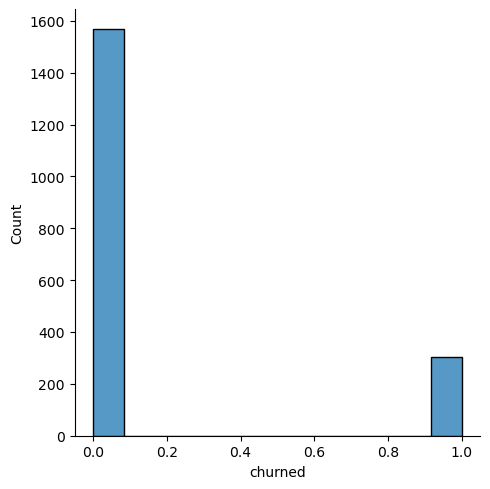

In [184]:
#only 16% churn with lower than average monthly payments 
sns.displot(train.churned[train['monthly_charges'] < avg_monthly_charges ]);

In [151]:
low_charges_churn = train.churned [train['monthly_charges'] < train['monthly_charges'].mean()]

In [112]:
high_charges_churn = train.churned [train.monthly_charges > train.monthly_charges.mean()]

In [107]:
alpha = 0.5

In [187]:
#comparing categorical (churned:True or False) vs continuous variable (monthly charges)
# We will use a one sample ttest comparing monthly charges of customers who churned to monthly 
# charges of all customers.
# in this case represents our population
#So we will use a one sample, two tailed ttest

mc_churn = train [train.churned == True].monthly_charges

monthly_charges_mean = train.monthly_charges.mean()

t, p = stats.ttest_1samp(mc_churn, monthly_charges_mean)

print(t, p, alpha)

12.630413381380539 2.7605654410224826e-34 0.5


In [188]:
if p < alpha:
    print('We can reject our null hypothesis and say that there is a difference in means')
else:
    print('We fail to reject our null hypothesis')

We can reject our null hypothesis and say that there is a difference in means


>My p-value is less than alpha, therefore, we reject the null hypothesis.

>   We can conclude that there is a relationship between monthly charges and churning.

Summarize

We confirmed there is a relationship between monthly charges and churning.